In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# LDA using gensim

In [2]:
#https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/
#Preparing Documents
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [3]:
#Cleaning and Preprocessing
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]        

In [4]:
#Preparing Document-Term Matrix
import gensim
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

C:\Users\gmanish\AppData\Local\Continuum\Anaconda\envs\py36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
#Running LDA Model
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [6]:
print(ldamodel.print_topics(num_topics=3, num_words=10))

[(0, '0.029*"sister" + 0.029*"father" + 0.029*"driving" + 0.029*"pressure" + 0.029*"expert" + 0.029*"health" + 0.029*"say" + 0.029*"lifestyle" + 0.029*"good" + 0.029*"consume"'), (1, '0.072*"father" + 0.072*"sister" + 0.041*"pressure" + 0.041*"driving" + 0.041*"perform" + 0.041*"seems" + 0.041*"drive" + 0.041*"better" + 0.041*"never" + 0.041*"well"'), (2, '0.099*"sugar" + 0.040*"blood" + 0.040*"may" + 0.040*"suggest" + 0.040*"stress" + 0.040*"increased" + 0.040*"doctor" + 0.040*"cause" + 0.040*"driving" + 0.040*"consume"')]


In [14]:
ldamodel.alpha
ldamodel.eta
len(ldamodel.eta)
len(dictionary)
ldamodel.show_topics()

array([0.33333334, 0.33333334, 0.33333334], dtype=float32)

array([0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334,
       0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334,
       0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334,
       0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334,
       0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334,
       0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334,
       0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334],
      dtype=float32)

35

35

[(0,
  '0.029*"sister" + 0.029*"father" + 0.029*"driving" + 0.029*"pressure" + 0.029*"expert" + 0.029*"health" + 0.029*"say" + 0.029*"lifestyle" + 0.029*"good" + 0.029*"consume"'),
 (1,
  '0.072*"father" + 0.072*"sister" + 0.041*"pressure" + 0.041*"driving" + 0.041*"perform" + 0.041*"seems" + 0.041*"drive" + 0.041*"better" + 0.041*"never" + 0.041*"well"'),
 (2,
  '0.099*"sugar" + 0.040*"blood" + 0.040*"may" + 0.040*"suggest" + 0.040*"stress" + 0.040*"increased" + 0.040*"doctor" + 0.040*"cause" + 0.040*"driving" + 0.040*"consume"')]

# LDA using scikit learn

In [10]:
#https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
#load dataset
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
no_features = 1000
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [12]:
from sklearn.decomposition import LatentDirichletAllocation
no_topics = 20
# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', 
                                learning_offset=50.,random_state=0).fit(tf)

C:\Users\gmanish\AppData\Local\CONTIN~1\Anaconda\envs\py36\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [14]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
people gun state control right guns crime states law police
Topic 1:
time question book years did like don space answer just
Topic 2:
mr line rules science stephanopoulos title current define int yes
Topic 3:
key chip keys clipper encryption number des algorithm use bit
Topic 4:
edu com cs vs w7 cx mail uk 17 send
Topic 5:
use does window problem way used point different case value
Topic 6:
windows thanks know help db does dos problem like using
Topic 7:
bike water effect road design media dod paper like turn
Topic 8:
don just like think know people good ve going say
Topic 9:
car new price good power used air sale offer ground
Topic 10:
file available program edu ftp information files use image version
Topic 11:
ax max b8f g9v a86 145 pl 1d9 0t 34u
Topic 12:
government law privacy security legal encryption court fbi technology information
Topic 13:
card bit memory output video color data mode monitor 16
Topic 14:
drive scsi disk mac hard apple drives controller software port
T

# Mini Project: Topic Modeling with Gensim

Project description:

In this project, we will go over the entire text processing methodology before we actually start doing topic modeling on 20-newsgroups data.
Next, we will build topic models using Latent Dirichlet Allocation (LDA) implementations in gensim as well as mallet. We will interpret topics using words contained in them, and also visualize the topics using pyLDAvis. We will evaluate the models using perplexity and coherence score. Further, we will find the best number of topics k for LDA and build the best topic model with k number of topics. Finally, we will analyze the topic model from multiple perspectives like finding the dominant topic in each sentence, finding the most representative document for each topic, and topic distribution across documents.


In [56]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

#Make sure you have run the following from command line:
#python3 -m spacy download en (Make sure you run this in admin mode)

In [15]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [16]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [17]:
# Import Dataset -- This version of the dataset contains about 11k newsgroups posts from 20 different topics.
df = pd.read_json('newsgroups.json')
print(df.target_names.unique())
df.head()
len(df)
#This is imported using pandas.read_json and the resulting dataset has 3 columns

['rec.autos' 'comp.sys.mac.hardware' 'rec.motorcycles' 'misc.forsale'
 'comp.os.ms-windows.misc' 'alt.atheism' 'comp.graphics'
 'rec.sport.baseball' 'rec.sport.hockey' 'sci.electronics' 'sci.space'
 'talk.politics.misc' 'sci.med' 'talk.politics.mideast'
 'soc.religion.christian' 'comp.windows.x' 'comp.sys.ibm.pc.hardware'
 'talk.politics.guns' 'talk.religion.misc' 'sci.crypt']


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles
100,From: tchen@magnus.acs.ohio-state.edu (Tsung-K...,6,misc.forsale
1000,From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)\n...,2,comp.os.ms-windows.misc


11314

In [20]:
#Remove emails and newline characters
# Convert to list
data = df.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: '
 'rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: '
 '15 I was wondering if anyone out there could enlighten me on this car I saw '
 'the other day. It was a 2-door sports car, looked to be from the late 60s/ '
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition, the front bumper was separate from the rest of the body. This is '
 'all I know. If anyone can tellme a model name, engine specs, years of '
 'production, where this car is made, history, or whatever info you have on '
 'this funky looking car, please e-mail. Thanks, - IL ---- brought to you by '
 'your neighborhood Lerxst ---- ']


In [21]:
#After removing the emails and extra spaces, the text still looks messy. 
#It is not ready for the LDA to consume. 
#You need to break down each sentence into a list of words through tokenization, 
#while clearing up all the messy text in the process.

#Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


In [58]:
# Build the bigram and trigram models

#Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. 
#The two important arguments to Phrases are min_count and threshold. 
#The higher the values of these param, the harder it is for words to be combined to bigrams.

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

# See bigram and trigram example
print(bigram_mod[data_words[0]])
#print(trigram_mod[bigram_mod[data_words[0]]])

['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting', 'host', 'rac_wam', 'umd_edu', 'organization', 'university', 'of', 'maryland_college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


In [23]:
# Remove Stopwords, Make Bigrams and Lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
#    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        #nlp is defined below as the spacy model for basic NLP
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [24]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
# This is needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['where', 's', 'thing', 'car', 'nntp_post', 'host', 'rac_wam', 'umd', 'organization', 'university', 'maryland_college', 'park', 'line', 'wonder', 'anyone', 'could', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'front_bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'whatev', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


In [25]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
#Gensim creates a unique id for each word in the document. 
#The produced corpus shown below is a mapping of (word_id, word_frequency).

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]]


In [26]:
#This is used as the input by the LDA model.

#If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.
id2word[0]
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

'addition'

[[('addition', 1),
  ('anyone', 2),
  ('body', 1),
  ('bricklin', 1),
  ('bring', 1),
  ('call', 1),
  ('car', 5),
  ('could', 1),
  ('day', 1),
  ('door', 2),
  ('early', 1),
  ('engine', 1),
  ('enlighten', 1),
  ('front_bumper', 1),
  ('funky', 1),
  ('history', 1),
  ('host', 1),
  ('info', 1),
  ('know', 1),
  ('late', 1),
  ('lerxst', 1),
  ('line', 1),
  ('look', 2),
  ('mail', 1),
  ('make', 1),
  ('maryland_college', 1),
  ('model', 1),
  ('name', 1),
  ('neighborhood', 1),
  ('nntp_post', 1),
  ('organization', 1),
  ('park', 1),
  ('production', 1),
  ('rac_wam', 1),
  ('really', 1),
  ('rest', 1),
  ('s', 1),
  ('see', 1),
  ('separate', 1),
  ('small', 1),
  ('spec', 1),
  ('sport', 1),
  ('tellme', 1),
  ('thank', 1),
  ('thing', 1),
  ('umd', 1),
  ('university', 1),
  ('whatev', 1),
  ('where', 1),
  ('wonder', 1),
  ('year', 1)]]

In [27]:
# Build LDA model
# alpha and eta are hyperparameters that affect sparsity of the topics.
# According to the Gensim docs, both defaults to 1.0/num_topics prior
# chunksize is the number of documents to be used in each training chunk. 
# update_every determines how often the model parameters should be updated and 
# passes is the total number of training passes.
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
# each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"_" + 0.029*"blue" + 0.021*"tank" + 0.014*"cubs_suck" + 0.012*"eg" + '
  '0.012*"gas" + 0.011*"hi" + 0.007*"henry_spencer" + 0.007*"cigarette" + '
  '0.006*"xlib"'),
 (1,
  '0.020*"value" + 0.020*"bus" + 0.019*"specifically" + 0.015*"function" + '
  '0.015*"associate" + 0.013*"motorcycle" + 0.011*"properly" + 0.010*"code" + '
  '0.008*"confuse" + 0.008*"error"'),
 (2,
  '0.023*"window" + 0.020*"card" + 0.017*"file" + 0.014*"drive" + 0.013*"use" '
  '+ 0.013*"system" + 0.011*"problem" + 0.010*"run" + 0.009*"color" + '
  '0.009*"do"'),
 (3,
  '0.035*"game" + 0.033*"team" + 0.019*"player" + 0.017*"play" + 0.017*"win" + '
  '0.016*"hockey" + 0.013*"season" + 0.011*"contact" + 0.011*"year" + '
  '0.010*"nhl"'),
 (4,
  '0.026*"wire" + 0.017*"circuit" + 0.015*"faq" + 0.015*"connect" + '
  '0.013*"wiring" + 0.013*"voice" + 0.012*"cover" + 0.011*"outlet" + '
  '0.011*"neutral" + 0.010*"conference"'),
 (5,
  '0.030*"government" + 0.024*"gun" + 0.022*"law" + 0.017*"state" + '
  '0.0

Topic 17 is a represented as '0.025*"christian" + 0.023*"god" + 0.012*"man" + 0.011*"life" + '
  '0.011*"religion" + 0.010*"bible" + 0.009*"believe" + 0.008*"law" + '
  '0.008*"belief" + 0.008*"love"'

It means the top 10 keywords that contribute to this topic are: ‘christian’, 
    ‘god’, ‘man’.. and so on and the weight of ‘christian’ on topic 17 is 0.025.

The weights reflect how important a keyword is to that topic.

In [29]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.754123661303712

Coherence Score:  0.5152202258019667


In [30]:
# Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords.
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      16.258054        1       1  0.336978 -0.001277
13     15.227703        1       2  0.291075 -0.003103
18     14.570790        1       3  0.328797 -0.128179
2       6.162408        1       4  0.091756  0.226458
15      5.973721        1       5  0.059666  0.222613
10      4.344137        1       6 -0.084990 -0.112869
17      4.177835        1       7  0.060983 -0.182982
12      3.586196        1       8 -0.022526 -0.036459
5       3.365439        1       9 -0.022911 -0.021268
16      3.271728        1      10 -0.029288  0.219738
6       3.227785        1      11 -0.062703 -0.017222
9       2.969728        1      12 -0.062847  0.139472
14      2.741280        1      13 -0.088858 -0.062627
3       2.731828        1      14 -0.047748 -0.117467
8       2.290868        1      15 -0.111492  0.003695
19      2.124076        1      16 -0.113678 -0.023380
11      2.081726        1      17 -0.092186 -0.110820
4       1.693800        1      18 -0.134206  0.001647
0       1.679173        1      19 -0.164200 -0.027981
1       1.521726        1      20 -0.131620  0.032009, topic_info=      Category          Freq          Term         Total  loglift  logprob
term                                                                      
4146   Default  57084.000000            ax  57084.000000  30.0000  30.0000
21     Default  12491.000000          line  12491.000000  29.0000  29.0000
82     Default  16294.000000           not  16294.000000  28.0000  28.0000
30     Default  11141.000000  organization  11141.000000  27.0000  27.0000
3721   Default   3845.000000           max   3845.000000  26.0000  26.0000
65     Default  10454.000000            do  10454.000000  25.0000  25.0000
322    Default   9655.000000         write   9655.000000  24.0000  24.0000
55     Default   7586.000000       article   7586.000000  23.0000  23.0000
244    Default   8048.000000            be   8048.000000  22.0000  22.0000
154    Default  11783.000000         would  11783.000000  21.0000  21.0000
303    Default   6906.000000           say   6906.000000  20.0000  20.0000
226    Default   5804.000000            go   5804.000000  19.0000  19.0000
29     Default   4407.000000     nntp_post   4407.000000  18.0000  18.0000
16     Default   4083.000000          host   4083.000000  17.0000  17.0000
118    Default   6852.000000           get   6852.000000  16.0000  16.0000
46     Default   5027.000000    university   5027.000000  15.0000  15.0000
1911   Default   1863.000000         space   1863.000000  14.0000  14.0000
215    Default   2294.000000        window   2294.000000  13.0000  13.0000
36     Default   3735.000000             s   3735.000000  12.0000  12.0000
18     Default   7292.000000          know   7292.000000  11.0000  11.0000
50     Default   3461.000000          year   3461.000000  10.0000  10.0000
317    Default   4598.000000           use   4598.000000   9.0000   9.0000
2726   Default   1540.000000          game   1540.000000   8.0000   8.0000
23     Default   1948.000000          mail   1948.000000   7.0000   7.0000
681    Default   3006.000000         right   3006.000000   6.0000   6.0000
967    Default   1684.000000     christian   1684.000000   5.0000   5.0000
1362   Default   1746.000000    government   1746.000000   4.0000   4.0000
567    Default   1464.000000          team   1464.000000   3.0000   3.0000
206    Default   3380.000000        system   3380.000000   2.0000   2.0000
60     Default   2012.000000          card   2012.000000   1.0000   1.0000
...        ...           ...           ...           ...      ...      ...
11736  Topic20    119.371092          guru    120.322976   4.1774  -5.3259
3548   Topic20    117.623590  countersteer    118.575474   4.1773  -5.3407
10436  Topic20    113.026257       bradley    113.978141   4.1769  -5.3805
280    Topic20    112.216893          lane    113.168777   4.1769  -5

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

If you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

In [45]:
# So far we have seen Gensim’s inbuilt version of the LDA algorithm. 
# Mallet’s version, however, often gives a better quality of topics.

# Gensim provides a wrapper to implement Mallet’s LDA from within Gensim itself. 
# You only need to download the zipfile, unzip it and provide the path to mallet in the unzipped directory to gensim.models.wrappers.LdaMallet.

# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
os.environ.update({'MALLET_HOME': r'C:\\Users\\gmanish\\Desktop\\working\\openminds\\slides\\TextMining\\mallet-2.0.8\\'})
os.environ.update({'MALLET_PATH': r'C:\\Users\\gmanish\\Desktop\\working\\openminds\\slides\\TextMining\\mallet-2.0.8\\bin\\mallet'})
mallet_path = 'C:\\Users\\gmanish\\Desktop\\working\\openminds\\slides\\TextMining\\mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [46]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(13,
  [('write', 0.12864862732723256),
   ('article', 0.10300962448721994),
   ('line', 0.07490533291259072),
   ('organization', 0.0733275481224361),
   ('university', 0.02556011360050489),
   ('post', 0.015304512464499842),
   ('read', 0.012089775954559798),
   ('hear', 0.009959766487851057),
   ('opinion', 0.008165036289050173),
   ('group', 0.008046702429788577)]),
 (12,
  [('good', 0.024729434195031683),
   ('year', 0.024243443802687902),
   ('run', 0.015701228060337576),
   ('game', 0.014037645563468476),
   ('win', 0.01104693545673751),
   ('line', 0.010542253126226659),
   ('hit', 0.009906727228546328),
   ('organization', 0.0089721303201929),
   ('player', 0.0077571543393334455),
   ('team', 0.007420699452326211)]),
 (2,
  [('time', 0.01809007461484782),
   ('point', 0.01713725911213699),
   ('problem', 0.013312577164635783),
   ('good', 0.013003918621504107),
   ('number', 0.011326426539266734),
   ('find', 0.01111170755274035),
   ('make', 0.010534650276450695),
   ('work'

Just by changing the LDA algorithm, we increased the coherence score from .51 to .64. Yay!

In [55]:
#We will find the optimal number of topics by building many LDA models with different 
#values of number of topics (k) and pick the one that gives the highest coherence value.

#Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers 
#meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

#If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

#The compute_coherence_values() below trains multiple LDA models and provides the models and their corresponding coherence scores.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [48]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

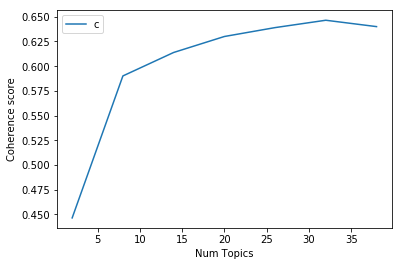

In [49]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [50]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4464
Num Topics = 8  has Coherence Value of 0.5901
Num Topics = 14  has Coherence Value of 0.6139
Num Topics = 20  has Coherence Value of 0.63
Num Topics = 26  has Coherence Value of 0.6391
Num Topics = 32  has Coherence Value of 0.6465
Num Topics = 38  has Coherence Value of 0.6401


In [60]:
# Select the model and print the topics
# If the coherence score seems to keep increasing, it may make better sense to pick the model
# that gave the highest CV before flattening out. This is exactly the case here.

# So for further steps I will choose the model with 32 topics itself.

optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(2,
  '0.034*"space" + 0.010*"launch" + 0.009*"earth" + 0.009*"nasa" + '
  '0.008*"satellite" + 0.007*"moon" + 0.007*"mission" + 0.007*"project" + '
  '0.007*"system" + 0.006*"orbit"'),
 (4,
  '0.076*"_" + 0.008*"cx" + 0.007*"air" + 0.005*"md" + 0.005*"mo" + '
  '0.005*"chz" + 0.004*"ms" + 0.004*"ck" + 0.004*"lk" + 0.004*"ca"'),
 (30,
  '0.023*"armenian" + 0.012*"people" + 0.011*"turkish" + 0.011*"war" + '
  '0.009*"turk" + 0.008*"turkey" + 0.008*"greek" + 0.007*"government" + '
  '0.007*"world" + 0.007*"history"'),
 (1,
  '0.014*"make" + 0.014*"president" + 0.013*"work" + 0.012*"government" + '
  '0.011*"money" + 0.010*"people" + 0.010*"pay" + 0.008*"year" + 0.008*"tax" + '
  '0.008*"job"'),
 (16,
  '0.010*"food" + 0.009*"doctor" + 0.008*"disease" + 0.008*"patient" + '
  '0.008*"medical" + 0.007*"eat" + 0.007*"gordon_bank" + 0.007*"pain" + '
  '0.007*"msg" + 0.006*"day"'),
 (17,
  '0.030*"gun" + 0.020*"law" + 0.018*"state" + 0.011*"people" + 0.011*"crime" '
  '+ 0.010*"weapon" + 0.01

In [61]:
# Finding the dominant topic in each document
# To find that, we find the topic number that has the highest percentage contribution in that document.
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,13.0,0.1872,"car, good, engine, buy, drive, speed, article,...",From: (wheres my thing) Subject: WHAT car is t...
1,1,6.0,0.1705,"window, card, driver, monitor, bit, mac, probl...",From: (Guy Kuo) Subject: SI Clock Poll - Final...
2,2,8.0,0.2233,"bike, line, dod, back, leave, side, organizati...",From: (Irwin Arnstein) Subject: Re: Recommenda...
3,3,19.0,0.2664,"image, software, file, graphic, program, versi...",From: (Tsung-Kun Chen) Subject: ** Software fo...
4,4,6.0,0.2340,"window, card, driver, monitor, bit, mac, probl...",From: (Don A.B. Lindbergh) Subject: Diamond SS...
5,5,13.0,0.4768,"car, good, engine, buy, drive, speed, article,...",From: (Robert Loper) Subject: Re: SHO and SC N...
6,6,26.0,0.1053,"university, line, nntp_post, host, organizatio...",From: (Kim Richard Man) Subject: SyQuest 44M c...
7,7,18.0,0.1835,"sale, line, organization, price, sell, mail, i...",From: (Kirtley Wilson) Subject: Mirosoft Offic...
8,8,21.0,0.1860,"write, organization, line, system, moral, wate...",Subject: Re: Dont more innocents die without t...
9,9,25.0,0.2054,"god, christian, religion, people, church, fait...",From: (Jon Livesey) Subject: Re: Genocide is C...


In [62]:
#Find the most representative document for each topic
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3143,"good, thing, make, time, people, bad, give, pr...",From: (CHRISTOPHER M GRAWBURG) Subject: HELPHL...
1,1.0,0.8049,"make, president, work, government, money, peop...",From: (Clinton/Gore 92) Subject: CLINTON: Back...
2,2.0,0.7672,"space, launch, earth, nasa, satellite, moon, m...",From: (Jon Leech) Subject: Space FAQ 11/15 - U...
3,3.0,0.6753,"question, claim, make, exist, argument, reason...",From: mathew Subject: Alt.Atheism FAQ: Constru...
4,4.0,0.9797,"_, cx, air, md, mo, chz, ms, ck, lk, ca",Subject: roman 02/14 From: (Cliff) Reply-To: (...


In [63]:
#Topic distribution across documents

# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,13.0,"car, good, engine, buy, drive, speed, article,...",82.0,0.0072
1,6.0,"window, card, driver, monitor, bit, mac, probl...",238.0,0.0210
2,8.0,"bike, line, dod, back, leave, side, organizati...",487.0,0.0430
3,19.0,"image, software, file, graphic, program, versi...",148.0,0.0131
4,6.0,"window, card, driver, monitor, bit, mac, probl...",31.0,0.0027
5,13.0,"car, good, engine, buy, drive, speed, article,...",537.0,0.0475
6,26.0,"university, line, nntp_post, host, organizatio...",847.0,0.0749
7,18.0,"sale, line, organization, price, sell, mail, i...",314.0,0.0278
8,21.0,"write, organization, line, system, moral, wate...",555.0,0.0491
9,25.0,"god, christian, religion, people, church, fait...",246.0,0.0217


In [64]:
#more fun with pyLDAvis here: https://datascienceplus.com/topic-modeling-in-python-with-nltk-and-gensim/